In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
import seaborn as sns
sns.set()

In [2]:
df= pd.read_csv("geo_data.csv", na_values= -1)
df.head()

,adId,Title,Price,Description,Location,URL,Type,days_since,Furnished_room,Pets_allowed_room,...,size_(sq.ft.),furnished_apt,AC,Title_length,postal_code,longitude,latitude,District,desc_len,Description_clean
0,1569922397,belle chambre meublee t.inclus avec wifi,470.0,"""salut a vous tous, hello, hallo, hola\nje sui...",", MONTREAL H2A1W7 QC, CANADA",https://www.kijiji.ca/v-chambres-a-louer-coloc...,Room,1,1.0,NaN,...,NaN,0,0.0,40,H2A1W7,-73.6118,45.5583,Saint-Michel East,814,"""Salut à vous tous, Hello, Hallo, Hola\nJe su..."
1,1569922379,"style condo, face au parc, cote-des-neiges",1280.0,1000pc\n2 chambres fermees\nrenove en 2019\nde...,"6658 AVE MCLYNN, MONTREAL, QC H3X 2R6, CANADA",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,1,NaN,NaN,...,1000.0,0,0.0,42,H3X 2R6,-73.6483,45.4915,Hampstead,910,1000pc\n2 chambres fermees\nRénove en 2019\nD...
2,1558165068,louis 438-939-9179. 1 chambre a louer disponib...,940.0,"""une visite simpose\n* 1 chambres a coucher\n*...","11945 RUE LACHAPELLE, MONTRÉAL, QC H4J 2M3, CA...",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,3,NaN,NaN,...,550.0,0,0.0,63,H4J 2M3,-73.7231,45.5353,Cartierville Central,336,"""UNE VISITE SIMPOSE\n* 1 Chambres a coucher\n*..."
3,1505844985,ddo @ 514-683-2252 - 4.5 unit,1100.0,"renovated building heated, hot water and avail...","4452 DES SOURCES, DOLLAD DES ORMEAUX, QC, H8Y 3B9",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,2,NaN,NaN,...,NaN,0,NaN,29,H8Y 3B9,-73.8162,45.5145,Roxboro,281,"Renovated building Heated, hot water and avail..."
4,1569642212,condo for rent,1600.0,"spacious and modern 4 1/2 for rent, bright, wi...","4885 BOUL HENRI-BOURASSA O, SAINT-LAURENT, QC ...",https://www.kijiji.ca/v-appartement-condo/vill...,apartment,2,NaN,NaN,...,940.0,0,1.0,14,H4L 0A5,-73.6974,45.5269,Saint-Laurent Inner Northeast,546,"Spacious and modern 4 1/2 for rent, bright, wi..."


In [3]:
df_mtl= df[['Price', 'longitude', 'latitude']].copy()
df_mtl

,Price,longitude,latitude
0,470.0,-73.6118,45.5583
1,1280.0,-73.6483,45.4915
2,940.0,-73.7231,45.5353
3,1100.0,-73.8162,45.5145
4,1600.0,-73.6974,45.5269
...,...,...,...
1520,1135.0,-73.5744,45.5252
1521,1045.0,-73.5967,45.5123
1522,1250.0,-73.5967,45.5123
1523,810.0,-73.5967,45.5123


### source https://donnees.montreal.ca/ville-de-montreal/polygones-arrondissements

<AxesSubplot:>

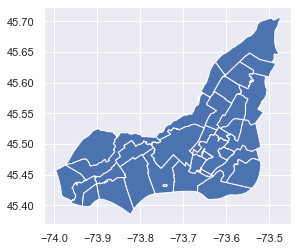

In [4]:
mtl_map = gpd.read_file('LIMADMIN.shp')
mtl_map.plot()

### We first need to reformat our data into a ‘GeoPandas Dataframe’

In [5]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df_mtl['longitude'], df_mtl['latitude'])]
geo_df = gpd.GeoDataFrame(df_mtl, 
                          crs = crs, 
                          geometry = geometry)

C:\Users\Vanessa\Anaconda3\envs\geo-env\lib\site-packages\pyproj\crs\crs.py:68: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [6]:
geo_df.head()

,Price,longitude,latitude,geometry
0,470.0,-73.6118,45.5583,POINT (-73.61180 45.55830)
1,1280.0,-73.6483,45.4915,POINT (-73.64830 45.49150)
2,940.0,-73.7231,45.5353,POINT (-73.72310 45.53530)
3,1100.0,-73.8162,45.5145,POINT (-73.81620 45.51450)
4,1600.0,-73.6974,45.5269,POINT (-73.69740 45.52690)


In [7]:
max(geo_df.latitude)

45.6595

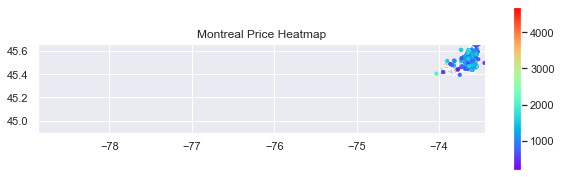

In [8]:
#geo_df['Price'] = np.log(geo_df['Price'])
fig, ax = plt.subplots(figsize = (10,10))
mtl_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'Price', ax=ax, cmap = 'rainbow',
            legend = True, legend_kwds={'shrink': 0.3}, 
            markersize = 10)

ax.set_xlim(-78.8641, -73.4481)
ax.set_ylim(44.8973, 45.6595)


ax.set_title('Montreal Price Heatmap')
plt.savefig('Heat Map')

<AxesSubplot:>

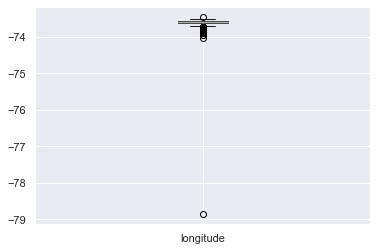

In [9]:
geo_df.boxplot("longitude")

In [10]:
min(geo_df.longitude)

-78.8641

In [11]:
geo_df.longitude.sort_values()

218    -78.8641
432    -74.0340
1028   -73.9515
1085   -73.9515
946    -73.9012
         ...   
1294        NaN
1296        NaN
1455        NaN
1475        NaN
1501        NaN
Name: longitude, Length: 1525, dtype: float64

In [12]:
geo_df= geo_df.drop(218)

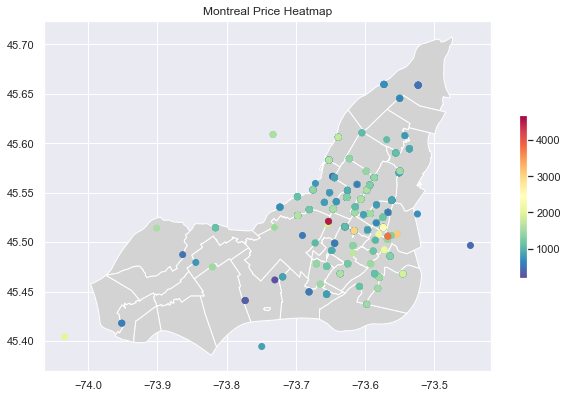

In [13]:
fig, ax = plt.subplots(figsize = (10,10))
mtl_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey')
geo_df.plot(column = 'Price', ax=ax, cmap= 'Spectral_r',
            legend = True, legend_kwds={'shrink': 0.3})


ax.set_title('Montreal Price Heatmap')
plt.savefig('Heat Map')